
| [Nazaj](Vprasanje_6.ipynb) | [Na kazalo](report.ipynb) |  |
|---|:---:|---:|


In [17]:
% matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from Orange.data.filter import SameValue
from Orange.data import Table
import numpy as np
from csv import DictReader
from collections import defaultdict

In [18]:
crash1 = defaultdict(list)
#crash2 = defaultdict(list)
liquor = defaultdict(list)
crash1_month = defaultdict(int)
liquor_month = defaultdict(int)

crash1_filt_reader = DictReader(open('data/Crash_Data_1.csv', 'rt', encoding='utf-8'))
#crash2_filt_reader = DictReader(open('data/Crash_Data_2_filt.csv', 'rt', encoding='utf-8'))
liquor_filt_reader = DictReader(open('data/Liquor_Data_filt_non_rand.csv', 'rt', encoding='utf-8'))

# prepis podatkov v seznam
for row in crash1_filt_reader:
    crash1[row["OBJECTID"]] = [row["CRASH_DATE"], row["CITYNAME"], row["DRUGALC"]]

#for row in crash2_filt_reader:
#    crash2[int(row["OBJECTID"])] = [row["CRASH_DATE"], row["DRUGALC"]]

for row in liquor_filt_reader:
    liquor[row["Invoice/Item Number"]] = [row["Date"], row["City"]]   

print("Število prometnih nesreč mesec-leto:")

x = 0
for key in crash1.keys():
    date = (crash1[key][0].split("T")[0])
    ymd = date.split("-")
    month_year = ymd[1] + "-" + ymd[0]
    crash1_month[month_year] += 1

x = 0
for e in crash1_month.keys():
    print(e + ": " + str(crash1_month[e]))
    x = x + 1
    if x > 5:
        break

print("Število prodanega alkohola mesec-leto:")      

x = 0
for key in liquor.keys():
    mdy = liquor[key][0].split("/")
    month_year = mdy[0] + "-" + mdy[2]
    liquor_month[month_year] += 1

x = 0
for e in liquor_month.keys():
    print(e + ": " + str(liquor_month[e]))
    x = x + 1
    if x > 5:
        break

Število prometnih nesreč mesec-leto:
01-2016: 3157
03-2016: 2276
02-2016: 2865
04-2016: 2357
05-2016: 2738
01-2006: 2610
Število prodanega alkohola mesec-leto:
11-2015: 5304
01-2015: 4870
02-2015: 4786
06-2012: 5067
04-2012: 5048
06-2014: 5710


**Uporabljen drug pristop**

In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
from csv import DictReader
import pandas as pd
from collections import defaultdict
import csv


# Za vsak mesec iščem število prodanega alkohola
# relevantno gledati po atributu Bottle Volume(ml) ali po  Sale(Dollars)
# podatke shranim v slovar, kjer je ključ posamezen mesec letu(1, 2, 3,..,12)

liquor_reader = DictReader(open('data/Liquor_Data_filt.csv', 'rt', encoding='utf-8'))
#print(liquor_reader.fieldnames)

alkohol_kolicina = defaultdict(float)
alkohol_denar = defaultdict(float)

for i, liquor in enumerate(liquor_reader):
    try:
        # shranim datum in ceno alkohila, ki pa ji odrežem znak $
        datum = pd.DatetimeIndex([liquor['Date']])
        cena = liquor['Sale (Dollars)'].strip("$")
        # za mesec shranim količino alkohola
        alkohol_kolicina[datum.month[0]] += float(liquor['Volume Sold (Liters)'])
        # za še mesec shranim koliko denarja je bilo porabljeno za alkohol
        alkohol_denar[datum.month[0]] += float(cena)
    except Exception as e:
        pass
        #print(i, e)

    #if i % 10000 == 0:
    #    print(i)

meseci = ['01-januar', '02-februar', '03-marec', '04-april', '05-maj', '06-junij', '07-julij', '08-avgust', '09-september', '10-oktober', '11-november', '12-december']
# shranim podatke v csv datoteko
with open('export/litri_cena.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    filewriter.writerow(["Mesec", "Kolicina(l)", "Skupna cena($)"])
    for mesec, _ in sorted(alkohol_kolicina.items()):
        print("Mesec: {}, količina prodanega alkohola: {:.2f} litrov, cena: {:.2f}$".format(meseci[mesec - 1], alkohol_kolicina[mesec], alkohol_denar[mesec]))
        filewriter.writerow([mesec, alkohol_kolicina[mesec], alkohol_denar[mesec]])

Mesec: 1-januar, količina prodanega alkohola: 206808.68 litrov, cena: 3101926.41$
Mesec: 2-februar, količina prodanega alkohola: 220448.07 litrov, cena: 3238529.56$
Mesec: 3-marec, količina prodanega alkohola: 236121.61 litrov, cena: 3739737.42$
Mesec: 4-april, količina prodanega alkohola: 244784.19 litrov, cena: 3678158.20$
Mesec: 5-maj, količina prodanega alkohola: 260013.39 litrov, cena: 3788373.61$
Mesec: 6-junij, količina prodanega alkohola: 266225.78 litrov, cena: 3746400.74$
Mesec: 7-julij, količina prodanega alkohola: 238908.91 litrov, cena: 3282433.75$
Mesec: 8-avgust, količina prodanega alkohola: 237938.80 litrov, cena: 3368905.37$
Mesec: 9-september, količina prodanega alkohola: 189006.85 litrov, cena: 2980050.60$
Mesec: 10-oktober, količina prodanega alkohola: 267046.56 litrov, cena: 4040425.80$
Mesec: 11-november, količina prodanega alkohola: 170003.88 litrov, cena: 2820874.59$
Mesec: 12-december, količina prodanega alkohola: 233509.65 litrov, cena: 3861972.63$


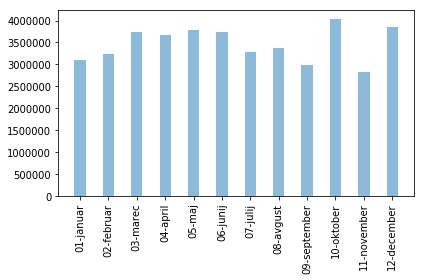

In [25]:
cash = []
months = []
meseci = ['01-januar', '02-februar', '03-marec', '04-april', '05-maj', '06-junij', '07-julij', '08-avgust', '09-september', '10-oktober', '11-november', '12-december']
for mesec, _ in sorted(alkohol_kolicina.items()):
    #print(mesec)
    cash.append(alkohol_denar[mesec])
    months.append(meseci[mesec-1])

pyplot1 = plt
pyplot1.figure()
xlen= range(len(months))
ylabel = cash
#plt.set_ylabel("Frekvenčna porazdelitev")
pyplot1.bar(months,ylabel,align="center", width=0.4, alpha=0.5)
pyplot1.xticks(rotation=90)
pyplot1.tight_layout()
#plt.set_title("Frekvenca žanrov")
pyplot1.show()